In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [18]:
(x_train,_),(x_test,_)= mnist.load_data()

In [19]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [20]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded =layers.Dense(784,activation = 'sigmoid')(encoded)
autoencoder = keras.Model(input_img,decoded)

In [21]:
encoder = keras.Model(input_img,encoded)

In [22]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

In [23]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [24]:
autoencoder.fit(x_train,x_train,epochs=20,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.1905 - val_loss: 0.1334
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1199 - val_loss: 0.1079
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1039 - val_loss: 0.0982
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0974 - val_loss: 0.0946
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0953 - val_loss: 0.0937
Epoch 6/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0946 - val_loss: 0.0932
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 8/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0939 - val_loss: 0.0927
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0937 - val_loss: 0.0927
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0936 - val_loss: 0.0923

In [26]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


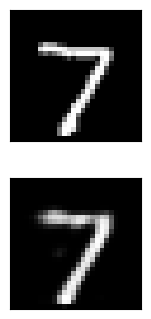

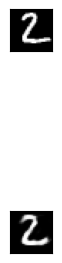

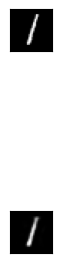

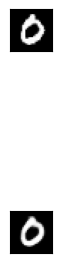

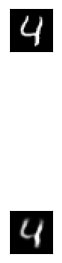

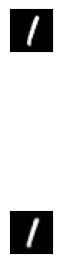

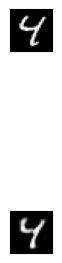

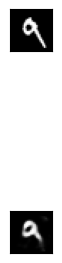

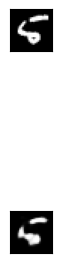

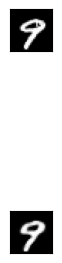

In [28]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize = (20,4))
for i in range(n):

  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

